# GPT Annotations EDA

Conda environment should be __annotation__

In [1]:
!conda env list

# conda environments:
#
base                     /Users/kylehamilton/opt/anaconda3
annotation            *  /Users/kylehamilton/opt/anaconda3/envs/annotation
mapping                  /Users/kylehamilton/opt/anaconda3/envs/mapping
mlflow                   /Users/kylehamilton/opt/anaconda3/envs/mlflow
nlp                      /Users/kylehamilton/opt/anaconda3/envs/nlp
pyg                      /Users/kylehamilton/opt/anaconda3/envs/pyg
si                       /Users/kylehamilton/opt/anaconda3/envs/si
torch                    /Users/kylehamilton/opt/anaconda3/envs/torch
transformers             /Users/kylehamilton/opt/anaconda3/envs/transformers



In [12]:
import utils
import pandas as pd
import matplotlib.pyplot as plt
import ast
import re
import numpy as np

In [3]:
conn = utils.connectDB()

## Make CVSs for Modifying phrases

1. prepositional phrases
2. single word modifiers
3. multiplying and embedding modifiers

In [17]:
properties = ["single word modifiers",
              "prepositional phrases",
              "multiplying and embedding modifiers"]

feature_prop_dict = {"prepositional phrases":"Modifying phrases",
                     "single word modifiers":"Modifying phrases",
                     "multiplying and embedding modifiers":"Modifying phrases"}

In [7]:
conn = utils.connectDB()
query = """SELECT f.PTC_id, f.Modifying_phrases, p.technique_classification, p.labels

        FROM ebdb.PTC_interpretable_features as f
        JOIN ebdb.PTC as p on p.id=f.PTC_id;"""

mf = pd.read_sql(query, conn)

/Users/kylehamilton/opt/anaconda3/envs/annotation/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [13]:
mf['techniques'] = mf['technique_classification'].apply(makeTArr)

In [18]:
for i,prop in enumerate(properties):
    mf[prop] = mf['Modifying_phrases'].apply(lambda x: ast.literal_eval(x)[i])

In [36]:
mf.head()

PTC_id Modifying_phrases technique_classification  labels  \
0       1         [0, 0, 0]                       []       0   
1       2         [2, 1, 1]             [9, 9, 1, 9]       1   
2       3         [2, 1, 1]                      [8]       1   
3       4         [2, 1, 1]                       []       0   
4       5         [2, 1, 1]                       []       0   

                                          techniques  prepositional phrases  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...                      0   
1  [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...                      1   
2  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...                      1   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...                      1   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...                      1   

   single word modifiers  multiplying and embedding modifiers  
0                      0                                    0  
1                      2                                    1  
2                      2                                    1  
3                      2                                    1  
4                      2                                    1

In [22]:
# answer, labels, technique_classification, techniques

for i,prop in enumerate(properties):
    
    df = mf[[prop,'labels','technique_classification','techniques']]
    df = df.rename(columns={prop:'answer'})
    df.to_csv("data/correlations/"+prop.replace("/","-")+".csv", index=None)
    

# Make CSVs for Sentiment

In [351]:
properties = ["negative",
              "neutral",
              "positive",
              "compound"]

feature_prop_dict = {"positive":"Sentiment",
                     "neutral":"Sentiment",
                     "negative":"Sentiment",
                     "compound":"Sentiment"}

In [375]:
# WHERE p.split = 'train' or p.split = 'validation'
conn = utils.connectDB()
query = """SELECT f.PTC_id, f.VADER_sentiment, p.technique_classification, p.labels

        FROM ebdb.PTC_interpretable_features as f
        JOIN ebdb.PTC as p on p.id=f.PTC_id;"""

sf = pd.read_sql(query, conn)

/Users/kylehamilton/opt/anaconda3/envs/annotation/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [376]:
sf.head()

PTC_id              VADER_sentiment technique_classification  labels
0       1         [0.0, 1.0, 0.0, 0.0]                       []       0
1       2  [0.0, 0.842, 0.158, 0.5423]             [9, 9, 1, 9]       1
2       3  [0.0, 0.912, 0.088, 0.3612]                      [8]       1
3       4         [0.0, 1.0, 0.0, 0.0]                       []       0
4       5         [0.0, 1.0, 0.0, 0.0]                       []       0

In [377]:
# create a one-hot-encoded array of techniques from dense list
# [9, 9, 1, 9]  -> [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]

def makeTArr(s):
    
    tArr = [0]*19
    
    if type(s) == list:
        
        if len(s) == 0:
            s = [18]
        for i in s:
            tArr[i] = 1
    else:
        try:
            _list = [re.sub(r"[\[\]]","",i) for i in s.split(",")]
            _list = [int(i) for i in _list if i != '']

            if len(_list) == 0:
                _list = [18]
                
            for i in _list:
                tArr[i] = 1
                
        except Exception as e:
            print(e,"-->",s)
    
    return tArr

sf['techniques'] = sf['technique_classification'].apply(makeTArr)

invalid literal for int() with base 10: ' it said' -->  it said
invalid literal for int() with base 10: ' using the model of a successful response to ' -->  using the model of a successful response to 
invalid literal for int() with base 10: ' an official statement released after a cabin' -->  an official statement released after a cabin
invalid literal for int() with base 10: ' no deaths have been reported' -->  no deaths have been reported
invalid literal for int() with base 10: ' of households rather than businesses' -->  of households rather than businesses
invalid literal for int() with base 10: ' Hispanics have gained 416' -->  Hispanics have gained 416
invalid literal for int() with base 10: ' June 3' -->  June 3
invalid literal for int() with base 10: ' and ""white folks are going down' -->  and ""white folks are going down
invalid literal for int() with base 10: ' according to a report in BuzzFeed News."' -->  according to a report in BuzzFeed News."
invalid literal for int() 

In [378]:
for i,prop in enumerate(properties):
    sf[prop] = sf['VADER_sentiment'].apply(lambda x: ast.literal_eval(x)[i])

In [379]:
sf.tail()

PTC_id                VADER_sentiment technique_classification  labels  \
20552   20553           [0.0, 1.0, 0.0, 0.0]                     [13]       1   
20553   20554           [0.0, 1.0, 0.0, 0.0]              [13, 7, 14]       1   
20554   20555  [0.175, 0.643, 0.181, 0.0258]                  [7, 14]       1   
20555   20556  [0.111, 0.541, 0.348, 0.8074]                       []       0   
20556   20557           [0.0, 1.0, 0.0, 0.0]                       []       0   

                                              techniques  negative  neutral  \
20552  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...     0.000    1.000   
20553  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, ...     0.000    1.000   
20554  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ...     0.175    0.643   
20555  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     0.111    0.541   
20556  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     0.000    1.000   

       positive  compound  
20552     0.000    0.0000  
20553     0.000    0.0000  
20554     0.181    0.0258  
20555     0.348    0.8074  
20556     0.000    0.0000

In [380]:
# answer, labels, technique_classification, techniques

for i,prop in enumerate(properties):
    
    df = sf[[prop,'labels','technique_classification','techniques']]
    df = df.rename(columns={prop:'answer'})
    df.to_csv("data/correlations_sentiment/"+prop+".csv", index=None)
    

In [383]:
from sklearn import preprocessing

properties = ["negative",
              "neutral",
              "positive",
              "compound"]

feature_prop_dict = {"negative":"Sentiment",
                     "neutral":"Sentiment",
                     "positive":"Sentiment",
                     "compound":"Sentiment"}

def str_to_list(s):
    s = [int(re.sub(r"[\[\]]","",i)) for i in s.split(" ")]
    return s

correlations     = defaultdict(list)
Q_table          = defaultdict(list)
frequencies      = defaultdict(list)
phi_coefficients = defaultdict(list)
covariances      = defaultdict(list)


for prop in tqdm(properties):
    
    df = pd.read_csv("data/correlations_sentiment/"+prop.replace("/","_")+".csv")
    df["techniques"] = df["techniques"].apply(lambda x: ast.literal_eval(x))
    
    
    long_property = feature_prop_dict[prop]+" - "+prop

    x = df['answer']
    
    x_reshaped = np.array(df['answer']).reshape(-1, 1)
    scaler = preprocessing.StandardScaler().fit(x_reshaped)
    x_scaled = scaler.transform(x_reshaped)
    x_scaled = [a[0] for a in x_scaled]
    
    for i in range(0,19):
        
        y = df['techniques'].apply(lambda z: z[i])
        
        
        y_reshaped = np.array(y).reshape(-1, 1)
        y_scaler = preprocessing.StandardScaler().fit(y_reshaped)
        y_scaled = y_scaler.transform(y_reshaped)
        y_scaled = [a[0] for a in y_scaled]
        
        
        p_r, p = scipy.stats.pearsonr(x, y)
        correlations[long_property].append([p_r,p])
        
        cov = np.cov(x_scaled, y_scaled, bias=True)[0][1]
        covariances[long_property].append([cov,0])
        
        
        
        """
        make conttingency table
        
                     X
               |  1   0
           --------------
        Y   1  |  a   b
            0  |  c   d
        
        calculate Yules Q
        
        Q = (ad - bc) / (ad + bc)
        
        """
        
        a = sum(x + y == 2)
        b = sum((x == 0) & (y == 1))
        c = sum((x == 1) & (y == 0))
        d = sum(x + y == 0)
        
        # Q = (a*d - b*c)/(a*d + b*c)
        
        phi = (a*d - b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
        
        # Q_table[long_property].append(Q)
        # frequencies[long_property].append(a)
        phi_coefficients[long_property].append(phi)

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 3/4 [00:03<00:01,  1.12s/it]/var/folders/vt/g1t9ds3s01z05zs4qg2dngk80000gn/T/ipykernel_57863/3469701028.py:80: RuntimeWarning: invalid value encountered in double_scalars
  phi = (a*d - b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
/var/folders/vt/g1t9ds3s01z05zs4qg2dngk80000gn/T/ipykernel_57863/3469701028.py:80: RuntimeWarning: invalid value encountered in double_scalars
  phi = (a*d - b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
/var/folders/vt/g1t9ds3s01z05zs4qg2dngk80000gn/T/ipykernel_57863/3469701028.py:80: RuntimeWarning: invalid value encountered in double_scalars
  phi = (a*d - b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
/var/folders/vt/g1t9ds3s01z05zs4qg2dngk80000gn/T/ipykernel_57863/3469701028.py:80: RuntimeWarning: invalid value encountered in double_scalars
  phi = (a*d - b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
/v

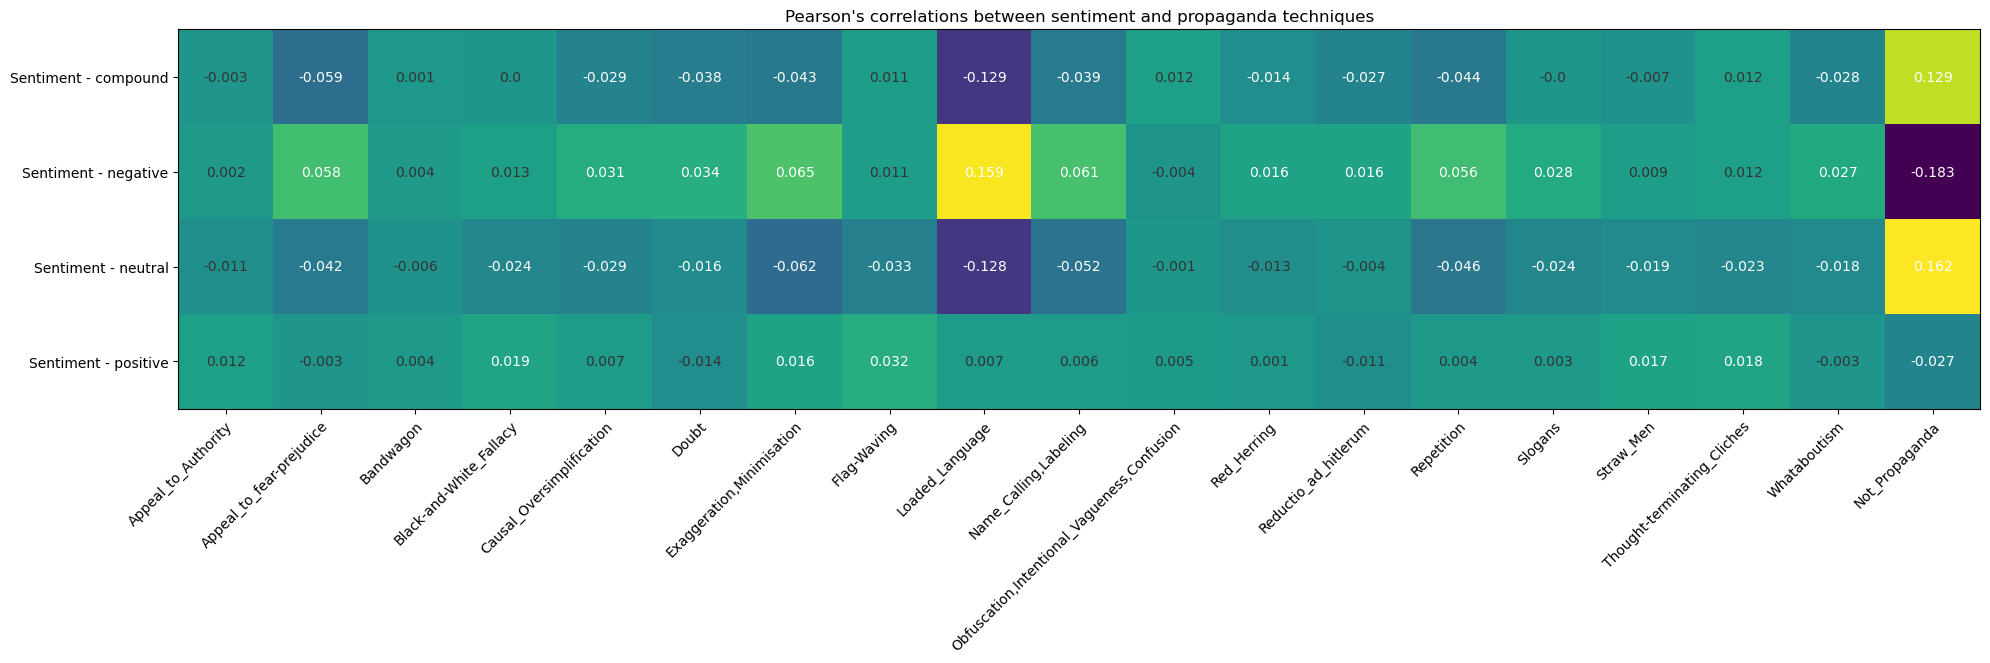

In [385]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl



from collections import OrderedDict
ordered_correlations = OrderedDict(sorted(correlations.items()))

_corrs = []
_props = []

for k,v in ordered_correlations.items():
    # f = feature_prop_dict[k]
    _props.append(k)
    v = [i.round(3) for i in list(np.array(v)[:,0])]
    _corrs.append(v)

_corrs = np.array(_corrs)

fig, ax = plt.subplots(figsize=[20,50])
im = ax.imshow(_corrs)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(techniques)), labels=techniques)
ax.set_yticks(np.arange(len(_props)), labels=_props)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(_props)):
    for j in range(len(techniques)):
        if ordered_correlations[_props[i]][j][1] > 0.05:
            text = ax.text(j, i, _corrs[i, j],
                       ha="center", va="center", color="#333333")
        else:
            text = ax.text(j, i, _corrs[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Pearson's correlations between sentiment and propaganda techniques")
fig.tight_layout()
# fig.savefig("sentiment_correlations.png",format="png")
plt.show()

# Make CSVs for POS

In [270]:
properties = ["S", "SBAR", "SBARQ", "SINV", "SQ", "ADJP", "ADVP", "CONJP", "FRAG", "INTJ", "LST", "NAC", "NP", "NX", "PP", "PRN", "PRT", "QP", "RRC", "UCP", "VP", "WHADJP", "WHAVP", "WHADVP", "WHNP", "WHPP", "X"]

feature_prop_dict = {"S":"POS",
 "SBAR":"POS",
 "SBARQ":"POS",
 "SINV":"POS",
 "SQ":"POS",
 "ADJP":"POS",
 "ADVP":"POS",
 "CONJP":"POS",
 "FRAG":"POS",
 "INTJ":"POS",
 "LST":"POS",
 "NAC":"POS",
 "NP":"POS",
 "NX":"POS",
 "PP":"POS",
 "PRN":"POS",
 "PRT":"POS",
 "QP":"POS",
 "RRC":"POS",
 "UCP":"POS",
 "VP":"POS",
 "WHADJP":"POS",
 "WHAVP":"POS",
 "WHADVP":"POS",
 "WHNP":"POS",
 "WHPP":"POS",
 "X":"POS"}

In [271]:
conn = utils.connectDB()
query = """SELECT f.PTC_id, f.parse_tree_features, p.technique_classification, p.labels

        FROM ebdb.PTC_interpretable_features as f
        JOIN ebdb.PTC as p on p.id=f.PTC_id;"""

pf = pd.read_sql(query, conn)

/Users/kylehamilton/opt/anaconda3/envs/annotation/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [272]:
pf['techniques'] = pf['technique_classification'].apply(makeTArr)

invalid literal for int() with base 10: ' it said' -->  it said
invalid literal for int() with base 10: ' using the model of a successful response to ' -->  using the model of a successful response to 
invalid literal for int() with base 10: ' an official statement released after a cabin' -->  an official statement released after a cabin
invalid literal for int() with base 10: ' no deaths have been reported' -->  no deaths have been reported
invalid literal for int() with base 10: ' of households rather than businesses' -->  of households rather than businesses
invalid literal for int() with base 10: ' Hispanics have gained 416' -->  Hispanics have gained 416
invalid literal for int() with base 10: ' June 3' -->  June 3
invalid literal for int() with base 10: ' and ""white folks are going down' -->  and ""white folks are going down
invalid literal for int() with base 10: ' according to a report in BuzzFeed News."' -->  according to a report in BuzzFeed News."
invalid literal for int() 

In [273]:
pf.loc[2353]
def none_to_0(l):
    if l is not None:
        return l
    else:
        return str([0]*len(properties))
    
pf['parse_tree_features'] = pf['parse_tree_features'].apply(none_to_0)

In [274]:
pf.loc[2353]

PTC_id                                                                   2354
parse_tree_features         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
technique_classification                                                  [1]
labels                                                                      1
techniques                  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 2353, dtype: object

In [275]:
for i,prop in enumerate(properties):
    pf[prop] = pf['parse_tree_features'].apply(lambda x: ast.literal_eval(x)[i])

In [277]:
# answer, labels, technique_classification, techniques

for i,prop in enumerate(properties):
    
    df = pf[[prop,'labels','technique_classification','techniques']]
    df = df.rename(columns={prop:'answer'})
    df.to_csv("data/correlations_pos/"+prop+".csv", index=None)
    

In [279]:
def str_to_list(s):
    s = [int(re.sub(r"[\[\]]","",i)) for i in s.split(" ")]
    return s

correlations     = defaultdict(list)
Q_table          = defaultdict(list)
frequencies      = defaultdict(list)
phi_coefficients = defaultdict(list)
covariances      = defaultdict(list)



for prop in tqdm(properties):
    
    df = pd.read_csv("data/correlations_pos/"+prop.replace("/","_")+".csv")
    df["techniques"] = df["techniques"].apply(lambda x: ast.literal_eval(x))
    
    
    long_property = feature_prop_dict[prop]+" - "+prop

    x = df['answer']
    
    for i in range(0,19):
        
        y = df['techniques'].apply(lambda z: z[i])
        
        p_r, p = scipy.stats.pearsonr(x, y)
        correlations[long_property].append([p_r,p])
        
        cov = np.cov(x, y, bias=True)[0][1]
        covariances[long_property].append([cov,0])
        
        """
        make conttingency table
        
                     X
               |  1   0
           --------------
        Y   1  |  a   b
            0  |  c   d
        
        calculate Yules Q
        
        Q = (ad - bc) / (ad + bc)
        
        """
        
        a = sum(x + y == 2)
        b = sum((x == 0) & (y == 1))
        c = sum((x == 1) & (y == 0))
        d = sum(x + y == 0)
        
        # Q = (a*d - b*c)/(a*d + b*c)
        
        phi = (a*d - b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
        
        # Q_table[long_property].append(Q)
        # frequencies[long_property].append(a)
        phi_coefficients[long_property].append(phi)

 41%|████████████████████████████████████████████████████████████████████████                                                                                                         | 11/27 [00:11<00:16,  1.03s/it]/Users/kylehamilton/opt/anaconda3/envs/annotation/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/var/folders/vt/g1t9ds3s01z05zs4qg2dngk80000gn/T/ipykernel_57863/2335386909.py:51: RuntimeWarning: invalid value encountered in double_scalars
  phi = (a*d - b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
 48%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                           | 13/27 [00:13<00:14,  1.01s/it]/Users/kylehamilton/opt/anaconda3/envs/annotation/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWa

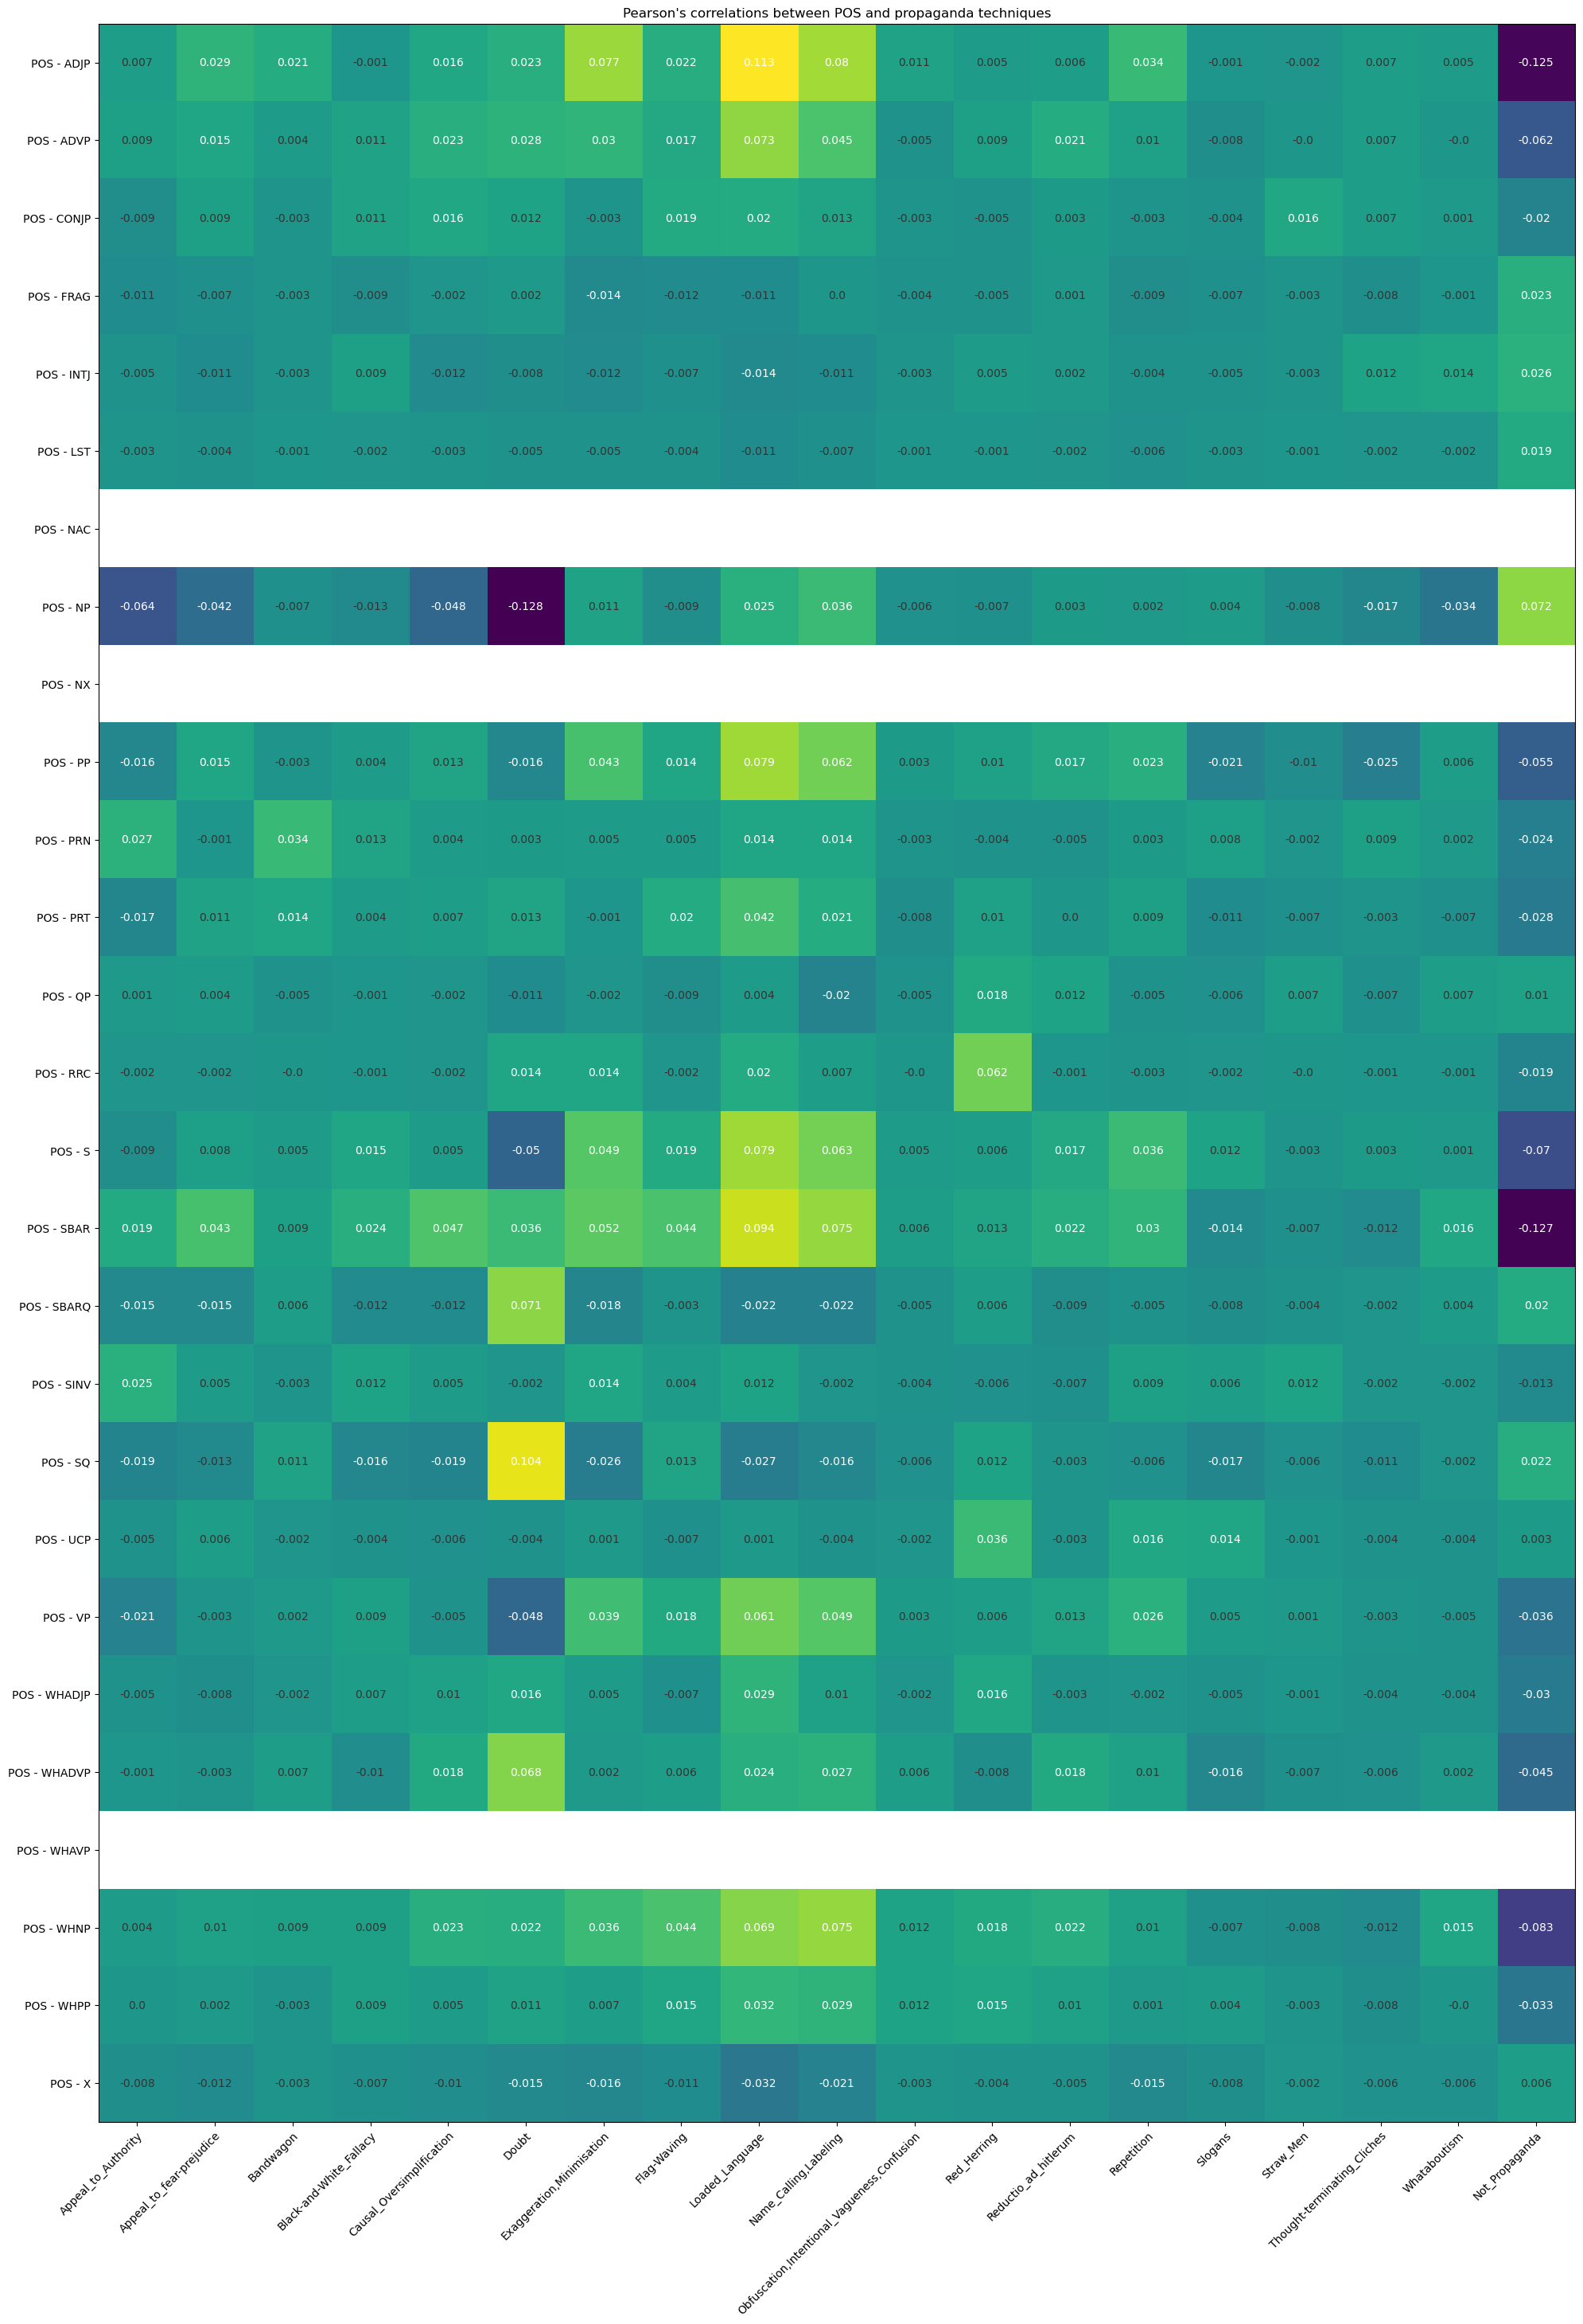

In [280]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl

from collections import OrderedDict
ordered_correlations = OrderedDict(sorted(correlations.items()))

_corrs = []
_props = []

for k,v in ordered_correlations.items():
    # f = feature_prop_dict[k]
    _props.append(k)
    v = [i.round(3) for i in list(np.array(v)[:,0])]
    _corrs.append(v)

_corrs = np.array(_corrs)

fig, ax = plt.subplots(figsize=[20,50])
im = ax.imshow(_corrs)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(techniques)), labels=techniques)
ax.set_yticks(np.arange(len(_props)), labels=_props)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(_props)):
    for j in range(len(techniques)):
        if ordered_correlations[_props[i]][j][1] > 0.05:
            text = ax.text(j, i, _corrs[i, j],
                       ha="center", va="center", color="#333333")
        else:
            text = ax.text(j, i, _corrs[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Pearson's correlations between POS and propaganda techniques")
fig.tight_layout()
fig.savefig("pos_correlations_lg.png",format="png")
plt.show()

# Calculate the correlations between properties and propaganda techniques using only the human expert annoatated data

In [46]:
path = "data/clean-annotated-data/" #non_agreed_sentences_Aspect.csv

# make individual property csvs and save to data/correlations_humans
# use props_a_majority column to get values
columns = ["props_a_majority"]

# get the list of distinct properties = ['simple',...]
# make a dictionary feature_prop_dict = {'simple': 'Aspect',...}
# for each property make an answer column
# for each property make a techniques column using makeArr()

In [191]:
# create a one-hot-encoded array of techniques from dense list
# [9, 9, 1, 9]  -> [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
def makeTArr(s):
    
    tArr = [0]*19
    
    if type(s) == list:
        
        if len(s) == 0:
            s = [18]
        for i in s:
            tArr[i] = 1
    else:
        try:
            _list = [re.sub(r"[\[\]]","",i) for i in s.split(" ")]
            _list = [int(i) for i in _list if i != '']

            if len(_list) == 0:
                _list = [18]
                
            for i in _list:
                tArr[i] = 1
                
        except Exception as e:
            print(e)
    
    return tArr

input_path = "data/clean-annotated-data/"
propa_humans_techniques = []

for _f in os.listdir(input_path):
    if _f.endswith(".csv"):
        _df = pd.read_csv(input_path+_f)
        propa_humans_techniques.append(list(_df['technique'].apply(lambda x: makeTArr(x))))

In [316]:
# propa_humans_techniques

In [217]:
techniques = ['Appeal_to_Authority',
             'Appeal_to_fear-prejudice',
             'Bandwagon',
             'Black-and-White_Fallacy',
             'Causal_Oversimplification',
             'Doubt',
             'Exaggeration,Minimisation',
             'Flag-Waving',
             'Loaded_Language',
             'Name_Calling,Labeling',
             'Obfuscation,Intentional_Vagueness,Confusion',
             'Red_Herring',
             'Reductio_ad_hitlerum',
             'Repetition',
             'Slogans',
             'Straw_Men',
             'Thought-terminating_Cliches',
             'Whataboutism',
             'Not_Propaganda']

In [218]:
tot = 0
for i in range(19):
    print(techniques[i], "&" ,sum(np.array(propa_humans_techniques[0])[:,i]), " \\\\")
    tot+=sum(np.array(propa_humans_techniques[0])[:,i])
tot

Appeal_to_Authority & 13  \\
Appeal_to_fear-prejudice & 20  \\
Bandwagon & 6  \\
Black-and-White_Fallacy & 16  \\
Causal_Oversimplification & 20  \\
Doubt & 22  \\
Exaggeration,Minimisation & 30  \\
Flag-Waving & 22  \\
Loaded_Language & 52  \\
Name_Calling,Labeling & 53  \\
Obfuscation,Intentional_Vagueness,Confusion & 6  \\
Red_Herring & 14  \\
Reductio_ad_hitlerum & 19  \\
Repetition & 29  \\
Slogans & 20  \\
Straw_Men & 8  \\
Thought-terminating_Cliches & 19  \\
Whataboutism & 15  \\
Not_Propaganda & 97  \\


481

In [318]:
# todo: fix aspect!!!!
import os

# create a one-hot-encoded array of techniques from dense list
# [9, 9, 1, 9]  -> [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
def makeTArr(s):
    
    tArr = [0]*19
    
    if type(s) == list:
        
        if len(s) == 0:
            s = [18]
        for i in s:
            tArr[i] = 1
    else:
        try:
            _list = [re.sub(r"[\[\]]","",i) for i in s.split(" ")]
            _list = [int(i) for i in _list if i != '']

            if len(_list) == 0:
                _list = [18]
                
            for i in _list:
                tArr[i] = 1
                
        except Exception as e:
            print(e)
    
    return np.array(tArr)




table = defaultdict(list) # answer, labels, technique_classification, techniques
input_path = "data/clean-annotated-data/"
properties = []

feature_prop_dict = defaultdict()

for _f in os.listdir(input_path):

    if _f.endswith(".csv"):
        
        _df = pd.read_csv(input_path+_f)
        
        _df["props_a_majority"] = _df["props_a_majority"].apply(lambda x: ast.literal_eval(x))
        xss = list(_df["props_a_majority"])
        distinct_props = set([x for xs in xss for x in xs])
        properties += list(distinct_props)
        
        for _p in distinct_props:
            
            feature_prop_dict[_p] = _f.split("non_agreed_sentences_")[1].split(".")[0]

            for row in _df.iterrows():
                technique_classification = row[1]['technique']
                techniques = makeTArr(row[1]['technique'])
                labels = 0 if technique_classification == '[]' else 1
                answer = 1 if _p in row[1]["props_a_majority"] else 0

                table[_p].append([answer,labels,technique_classification,techniques])

            temp_df = pd.DataFrame(table[_p], columns=["answer", "labels", "technique_classification", "techniques"])
            output_path = "data/correlations_humans/"+_p.replace("/","_")+".csv"
            temp_df.to_csv(output_path, index=None)

In [320]:
# feature_prop_dict

In [395]:
def str_to_list(s):
    s = [int(re.sub(r"[\[\]]","",i)) for i in s.split(" ")]
    return s

correlations     = defaultdict(list)
covariances      = defaultdict(list)
Q_table          = defaultdict(list)
frequencies      = defaultdict(list)
phi_coefficients = defaultdict(list)

input_path = "data/clean-annotated-data/"
properties = []
feature_prop_dict = defaultdict()
for _f in os.listdir(input_path):
    if _f.endswith(".csv"):
        _df = pd.read_csv(input_path+_f)
        _df["props_a_majority"] = _df["props_a_majority"].apply(lambda x: ast.literal_eval(x))
        xss = list(_df["props_a_majority"])
        distinct_props = set([x for xs in xss for x in xs])
        properties += list(distinct_props)
        for _p in distinct_props:
            feature_prop_dict[_p] = _f.split("non_agreed_sentences_")[1].split(".")[0]

for prop in tqdm(properties):
    
    df = pd.read_csv("data/correlations_humans/"+prop.replace("/","_")+".csv")
    df["techniques"] = df["techniques"].apply(lambda x: str_to_list(x))
    
    
    long_property = feature_prop_dict[prop]+" - "+prop

    x = df['answer']
    
    
    x_reshaped = np.array(df['answer']).reshape(-1, 1)
    scaler = preprocessing.StandardScaler().fit(x_reshaped)
    x_scaled = scaler.transform(x_reshaped)
    x_scaled = [a[0] for a in x_scaled]
    
    
    
    for i in range(0,19):
        
        y = df['techniques'].apply(lambda z: z[i])
        
        p_r, p = scipy.stats.pearsonr(x, y)
        correlations[long_property].append([p_r,p])
        
        cov = np.cov(x_scaled, y, bias=True)[0][1]
        covariances[long_property].append([cov,0])
        
        """
        make conttingency table
        
                     X
               |  1   0
           --------------
        Y   1  |  a   b
            0  |  c   d
        
        calculate Yules Q
        
        Q = (ad - bc) / (ad + bc)
        
        """
        
        a = sum(x + y == 2)
        b = sum((x == 0) & (y == 1))
        c = sum((x == 1) & (y == 0))
        d = sum(x + y == 0)
        
        # Q = (a*d - b*c)/(a*d + b*c)
        
        phi = (a*d - b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
        
        # Q_table[long_property].append(Q)
        # frequencies[long_property].append(a)
        phi_coefficients[long_property].append(phi)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 108/108 [00:04<00:00, 25.22it/s]


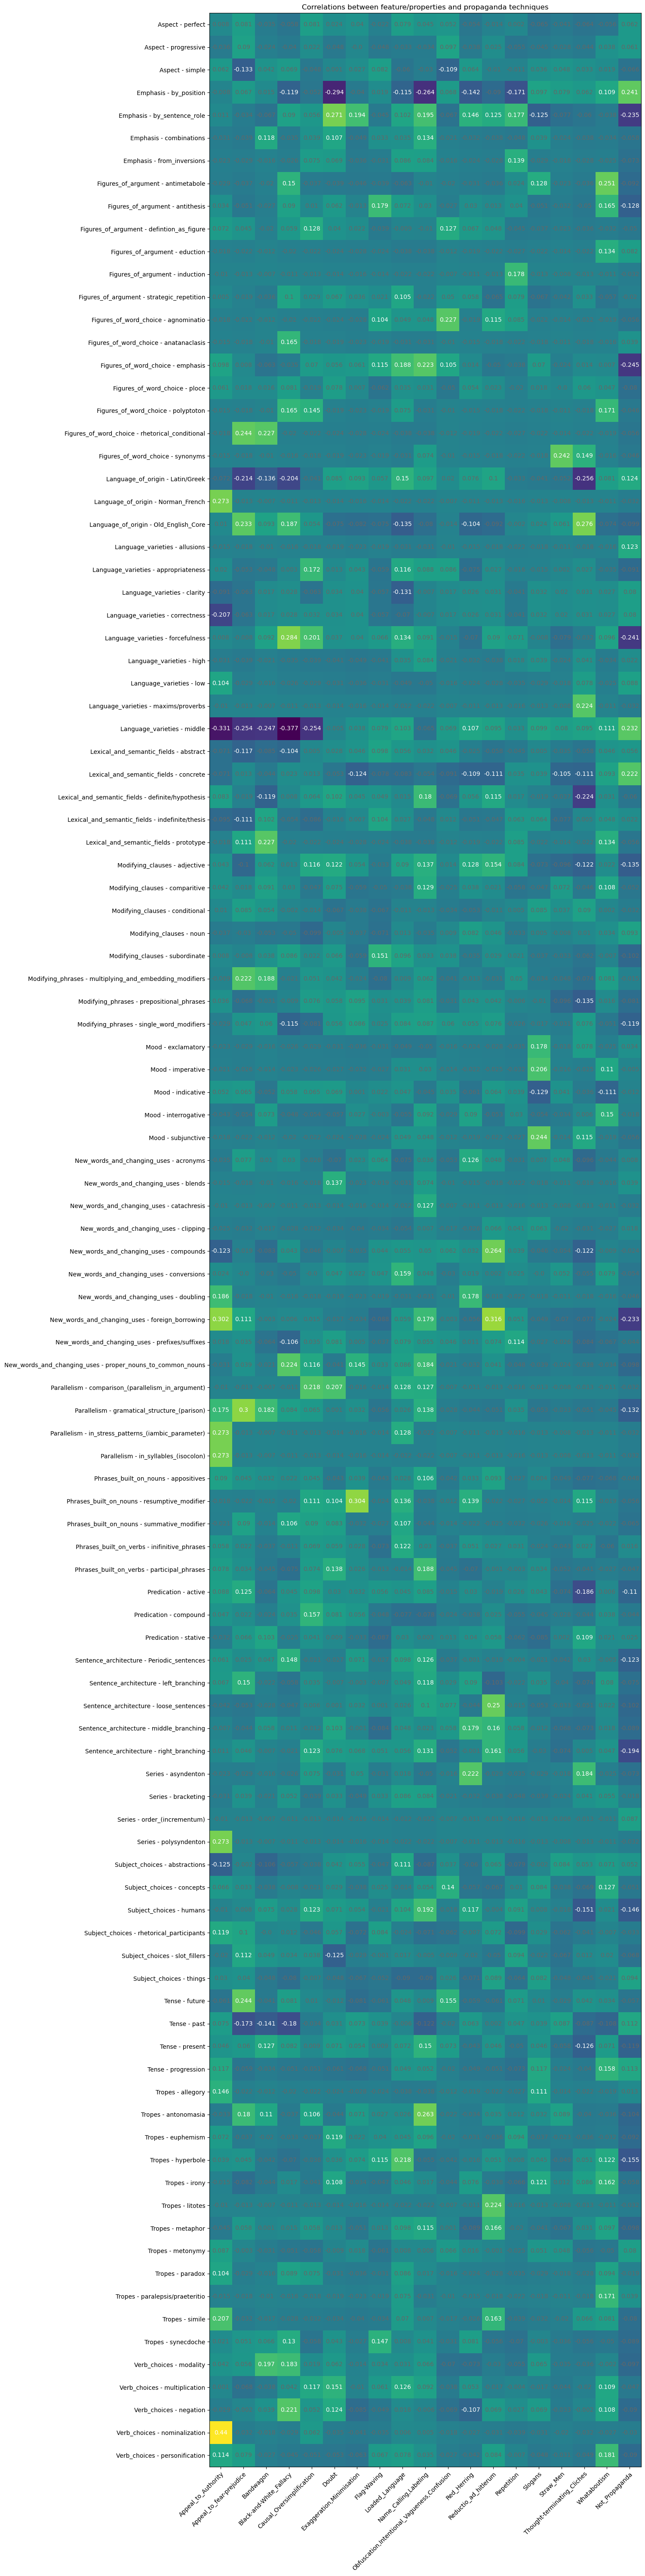

In [398]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl

from collections import OrderedDict
ordered_correlations = OrderedDict(sorted(correlations.items()))

_corrs = []
_props = []

for k,v in ordered_correlations.items():
    # f = feature_prop_dict[k]
    _props.append(k)
    v = [i.round(3) for i in list(np.array(v)[:,0])]
    _corrs.append(v)

_corrs = np.array(_corrs)

fig, ax = plt.subplots(figsize=[20,60])
im = ax.imshow(_corrs)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(techniques)), labels=techniques)
ax.set_yticks(np.arange(len(_props)), labels=_props)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(_props)):
    for j in range(len(techniques)):
        if ordered_correlations[_props[i]][j][1] > 0.05:
            text = ax.text(j, i, _corrs[i, j],
                       ha="center", va="center", color="#666666")
        else:
            text = ax.text(j, i, _corrs[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Correlations between feature/properties and propaganda techniques")
fig.tight_layout()
fig.savefig("humans_correlations.eps",format="eps")
plt.show()

In [326]:
def str_to_list(s):
    s = [int(re.sub(r"[\[\]]","",i)) for i in s.split(" ")]
    return s

def labels_to_list(s):
    if int(s) == 0:
        return [1,0]
    else:
        return [0,1]

correlations_binary     = defaultdict(list)
covariances_binary      = defaultdict(list)
phi_coefficients_binary = defaultdict(list)

# RC_table = [[0]*19]*len(properties)
# count = 0

for prop in tqdm(properties):
    
    
    df = pd.read_csv("data/correlations_humans/"+prop.replace("/","_")+".csv")
    df["techniques"] = df["techniques"].apply(lambda x: str_to_list(x))

    df["labels"] = df["labels"].apply(lambda x: labels_to_list(x))
    
    
    # y = df['labels']
    # x = df['answer']
    # correlations[prop] = [p_r, p]
    
    
    long_property = feature_prop_dict[prop]+" - "+prop

    x = df['answer']
    x_reshaped = np.array(df['answer']).reshape(-1, 1)
    x_scaler = preprocessing.StandardScaler().fit(x_reshaped)
    x_scaled = x_scaler.transform(x_reshaped)
    x_scaled = [a[0] for a in x_scaled]
    
    for i in range(0,2): # prop and not_prop
        
        y = df['labels'].apply(lambda z: z[i])
        
        p_r, p = scipy.stats.pearsonr(x, y)
        correlations_binary[long_property].append([p_r,p])
        
        cov = np.cov(x_scaled, y, bias=True)[0][1]
        covariances_binary[long_property].append([cov,0])
        
        """
        make conttingency table
        
                     X
               |  1   0
           --------------
        Y   1  |  a   b
            0  |  c   d
        
        calculate Yules Q
        
        Q = (ad - bc) / (ad + bc)
        
        """
        
        a = sum(x + y == 2)
        b = sum((x == 0) & (y == 1))
        c = sum((x == 1) & (y == 0))
        d = sum(x + y == 0)
                
        phi = (a*d - b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
        phi_coefficients_binary[long_property].append(phi)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 108/108 [00:01<00:00, 70.87it/s]


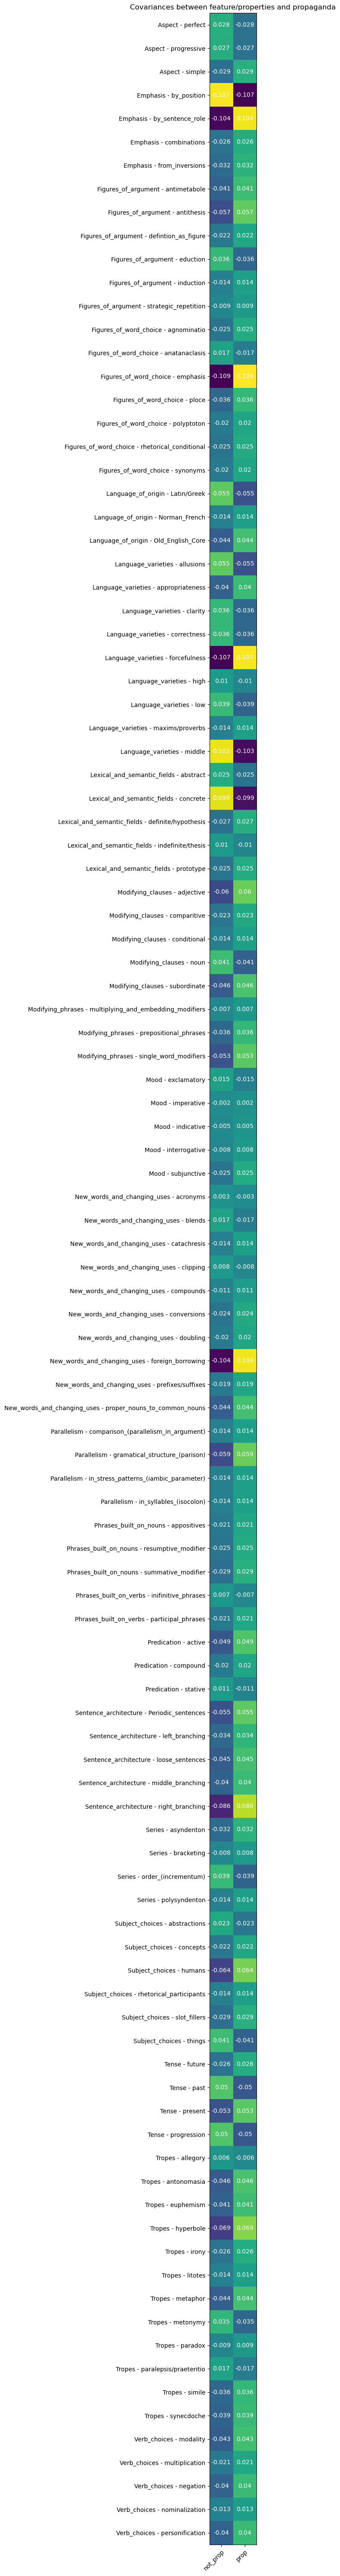

In [327]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl

from collections import OrderedDict
ordered_correlations = OrderedDict(sorted(covariances_binary.items()))

_corrs = []
_props = []

for k,v in ordered_correlations.items():
    # f = feature_prop_dict[k]
    _props.append(k)
    v = [i.round(3) for i in list(np.array(v)[:,0])]
    _corrs.append(v)

_corrs = np.array(_corrs)

fig, ax = plt.subplots(figsize=[20,60])
im = ax.imshow(_corrs)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(2), labels=["not_prop","prop"])
ax.set_yticks(np.arange(len(_props)), labels=_props)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(_props)):
    for j in range(2):
        if ordered_correlations[_props[i]][j][1] > 0.05:
            text = ax.text(j, i, _corrs[i, j],
                       ha="center", va="center", color="#333333")
        else:
            text = ax.text(j, i, _corrs[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Covariances between feature/properties and propaganda")
fig.tight_layout()
fig.savefig("huamns_covariances_binary.eps",format="eps")
plt.show()

# Calculate the correlations between properties and propaganda techniques

1. binary
2. per technique

In [23]:
import numpy as np
import scipy.stats
from collections import defaultdict
from tqdm import tqdm

In [4]:
conn = utils.connectDB()
query = 'SELECT distinct(property), feature FROM ebdb.PTC_annotations where answer="yes";'

df = pd.read_sql(query, conn)

/var/folders/vt/g1t9ds3s01z05zs4qg2dngk80000gn/T/ipykernel_72993/3113609672.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [5]:
# df.to_dict('records')
feature_prop_dict = dict(map(lambda i,j : (i,j) , df['property'],df['feature']))
feature_prop_dict

{'simple': 'Aspect',
 'correctness': 'Language varieties',
 'clarity': 'Language varieties',
 'middle': 'Language varieties',
 'abstract': 'Lexical and semantic fields',
 'concrete': 'Lexical and semantic fields',
 'indefinite/thesis': 'Lexical and semantic fields',
 'definite/hypothesis': 'Lexical and semantic fields',
 'indicative': 'Mood',
 'active': 'Predication',
 'humans': 'Subject choices',
 'abstractions': 'Subject choices',
 'perfect': 'Aspect',
 'emphasis': 'Figures of word choice',
 'forcefulness': 'Language varieties',
 'appositives': 'Phrases built on nouns',
 'stative': 'Predication',
 'present': 'Tense',
 'progressive': 'Aspect',
 'adjective': 'Modifying clauses',
 'past': 'Tense',
 'subordinate': 'Modifying clauses',
 'modality': 'Verb choices',
 'acronyms': 'New words and changing uses',
 'negation': 'Verb choices',
 'noun': 'Modifying clauses',
 'prefixes/suffixes': 'New words and changing uses',
 'compounds': 'New words and changing uses',
 'comparitive': 'Modifying 

In [6]:
properties = list(df['property'])

In [7]:
len(properties)

51

In [31]:
techniques = ['Appeal_to_Authority',
             'Appeal_to_fear-prejudice',
             'Bandwagon',
             'Black-and-White_Fallacy',
             'Causal_Oversimplification',
             'Doubt',
             'Exaggeration,Minimisation',
             'Flag-Waving',
             'Loaded_Language',
             'Name_Calling,Labeling',
             'Obfuscation,Intentional_Vagueness,Confusion',
             'Red_Herring',
             'Reductio_ad_hitlerum',
             'Repetition',
             'Slogans',
             'Straw_Men',
             'Thought-terminating_Cliches',
             'Whataboutism',
             'Not_Propaganda']

In [9]:
properties

['simple',
 'correctness',
 'clarity',
 'middle',
 'abstract',
 'concrete',
 'indefinite/thesis',
 'definite/hypothesis',
 'indicative',
 'active',
 'humans',
 'abstractions',
 'perfect',
 'emphasis',
 'forcefulness',
 'appositives',
 'stative',
 'present',
 'progressive',
 'adjective',
 'past',
 'subordinate',
 'modality',
 'acronyms',
 'negation',
 'noun',
 'prefixes/suffixes',
 'compounds',
 'comparitive',
 'future',
 'high',
 'conditional',
 'ploce',
 'perfect progressive',
 'low',
 'concepts',
 'allusions',
 'compound',
 'nominalization',
 'doubling',
 'prototype',
 'onomatopoeia',
 'rhetorical participants',
 'metaplasms',
 'register shift',
 'cliches/idioms',
 'maxims/proverbs',
 'personification',
 'multiplication',
 'blends',
 'slot fillers']

In [386]:
feature_prop_dict = {'simple': 'Aspect',  'correctness': 'Language varieties',  'clarity': 'Language varieties',  'middle': 'Language varieties',  'abstract': 'Lexical and semantic fields',  'concrete': 'Lexical and semantic fields',  'indefinite/thesis': 'Lexical and semantic fields',  'definite/hypothesis': 'Lexical and semantic fields',  'indicative': 'Mood',  'active': 'Predication',  'humans': 'Subject choices',  'abstractions': 'Subject choices',  'perfect': 'Aspect',  'emphasis': 'Figures of word choice',  'forcefulness': 'Language varieties',  'appositives': 'Phrases built on nouns',  'stative': 'Predication',  'present': 'Tense',  'progressive': 'Aspect',  'adjective': 'Modifying clauses',  'past': 'Tense',  'subordinate': 'Modifying clauses',  'modality': 'Verb choices',  'acronyms': 'New words and changing uses',  'negation': 'Verb choices',  'noun': 'Modifying clauses',  'prefixes/suffixes': 'New words and changing uses',  'compounds': 'New words and changing uses',  'comparitive': 'Modifying clauses',  'future': 'Tense',  'high': 'Language varieties',  'conditional': 'Modifying clauses',  'ploce': 'Figures of word choice',  'perfect progressive': 'Aspect',  'low': 'Language varieties',  'concepts': 'Subject choices',  'allusions': 'Language varieties',  'compound': 'Predication',  'nominalization': 'Verb choices',  'doubling': 'New words and changing uses',  'prototype': 'Lexical and semantic fields',  'onomatopoeia': 'New words and changing uses',  'rhetorical participants': 'Subject choices',  'metaplasms': 'Figures of word choice',  'register shift': 'Language varieties',  'cliches/idioms': 'Language varieties',  'maxims/proverbs': 'Language varieties',  'personification': 'Verb choices',  'multiplication': 'Verb choices',  'blends': 'New words and changing uses',  'slot fillers': 'Subject choices',  'prepositional phrases':'Modifying phrases',  'single word modifiers':'Modifying phrases',  'multiplying and embedding modifiers':'Modifying phrases'}
properties = [ 'simple',  'correctness',  'clarity',  'middle',  'abstract',  'concrete',  'indefinite/thesis',  'definite/hypothesis',  'indicative',  'active',  'humans',  'abstractions',  'perfect',  'emphasis',  'forcefulness',  'appositives',  'stative',  'present',  'progressive',  'adjective',  'past',  'subordinate',  'modality',  'acronyms',  'negation',  'noun',  'prefixes/suffixes',  'compounds',  'comparitive',  'future',  'high',  'conditional',  'ploce',  'perfect progressive',  'low',  'concepts',  'allusions',  'compound',  'nominalization',  'doubling',  'prototype',  'onomatopoeia',  'rhetorical participants',  'metaplasms',  'register shift',  'cliches/idioms',  'maxims/proverbs',  'personification',  'multiplication',  'blends',  'slot fillers',  'single word modifiers',  'prepositional phrases',  'multiplying and embedding modifiers']

# Coefficients for binary task

In [387]:
# conn = utils.connectDB()
feature_prop_dict = {'simple': 'Aspect',  'correctness': 'Language varieties',  'clarity': 'Language varieties',  'middle': 'Language varieties',  'abstract': 'Lexical and semantic fields',  'concrete': 'Lexical and semantic fields',  'indefinite/thesis': 'Lexical and semantic fields',  'definite/hypothesis': 'Lexical and semantic fields',  'indicative': 'Mood',  'active': 'Predication',  'humans': 'Subject choices',  'abstractions': 'Subject choices',  'perfect': 'Aspect',  'emphasis': 'Figures of word choice',  'forcefulness': 'Language varieties',  'appositives': 'Phrases built on nouns',  'stative': 'Predication',  'present': 'Tense',  'progressive': 'Aspect',  'adjective': 'Modifying clauses',  'past': 'Tense',  'subordinate': 'Modifying clauses',  'modality': 'Verb choices',  'acronyms': 'New words and changing uses',  'negation': 'Verb choices',  'noun': 'Modifying clauses',  'prefixes/suffixes': 'New words and changing uses',  'compounds': 'New words and changing uses',  'comparitive': 'Modifying clauses',  'future': 'Tense',  'high': 'Language varieties',  'conditional': 'Modifying clauses',  'ploce': 'Figures of word choice',  'perfect progressive': 'Aspect',  'low': 'Language varieties',  'concepts': 'Subject choices',  'allusions': 'Language varieties',  'compound': 'Predication',  'nominalization': 'Verb choices',  'doubling': 'New words and changing uses',  'prototype': 'Lexical and semantic fields',  'onomatopoeia': 'New words and changing uses',  'rhetorical participants': 'Subject choices',  'metaplasms': 'Figures of word choice',  'register shift': 'Language varieties',  'cliches/idioms': 'Language varieties',  'maxims/proverbs': 'Language varieties',  'personification': 'Verb choices',  'multiplication': 'Verb choices',  'blends': 'New words and changing uses',  'slot fillers': 'Subject choices',  'prepositional phrases':'Modifying phrases',  'single word modifiers':'Modifying phrases',  'multiplying and embedding modifiers':'Modifying phrases'}
properties = [ 'simple',  'correctness',  'clarity',  'middle',  'abstract',  'concrete',  'indefinite/thesis',  'definite/hypothesis',  'indicative',  'active',  'humans',  'abstractions',  'perfect',  'emphasis',  'forcefulness',  'appositives',  'stative',  'present',  'progressive',  'adjective',  'past',  'subordinate',  'modality',  'acronyms',  'negation',  'noun',  'prefixes/suffixes',  'compounds',  'comparitive',  'future',  'high',  'conditional',  'ploce',  'perfect progressive',  'low',  'concepts',  'allusions',  'compound',  'nominalization',  'doubling',  'prototype',  'onomatopoeia',  'rhetorical participants',  'metaplasms',  'register shift',  'cliches/idioms',  'maxims/proverbs',  'personification',  'multiplication',  'blends',  'slot fillers',  'single word modifiers',  'prepositional phrases',  'multiplying and embedding modifiers']

def str_to_list(s):
    s = [int(re.sub(r"[\[\]]","",i)) for i in s.split(" ")]
    return s

def labels_to_list(s):
    if int(s) == 0:
        return [1,0]
    else:
        return [0,1]

correlations_binary     = defaultdict(list)
covariances_binary      = defaultdict(list)
Q_table_binary          = defaultdict(list)
frequencies_binary      = defaultdict(list)
phi_coefficients_binary = defaultdict(list)

# RC_table = [[0]*19]*len(properties)
# count = 0

for prop in tqdm(properties):
    
    """
    query = f'SELECT pa.answer, p.labels, p.technique_classification FROM ebdb.PTC_annotations as pa \
            JOIN ebdb.PTC as p on pa.PTC_id = p.id \
            WHERE pa.property = "{prop}";'
    
    df = pd.read_sql(query, conn)
    df['answer'] = df['answer'].apply(lambda x: 0 if x=='no' else 1)
    df['techniques'] = df['technique_classification'].apply(makeTArr)
    
    df.to_csv("data/correlations/"+prop.replace("/","-")+".csv", index=None)
    """
    
    df = pd.read_csv("data/correlations/"+prop.replace("/","-")+".csv")
    df["techniques"] = df["techniques"].apply(lambda x: str_to_list(x))

    df["labels"] = df["labels"].apply(lambda x: labels_to_list(x))
    
    
    # y = df['labels']
    # x = df['answer']
    # correlations[prop] = [p_r, p]
    
    
    long_property = feature_prop_dict[prop]+" - "+prop

    x = df['answer']
    
    x_reshaped = np.array(df['answer']).reshape(-1, 1)
    x_scaler = preprocessing.StandardScaler().fit(x_reshaped)
    x_scaled = x_scaler.transform(x_reshaped)
    x_scaled = [a[0] for a in x_scaled]
    
    for i in range(1,2): # not_prop and prop  
        
        y = df['labels'].apply(lambda z: z[i])
        
        p_r, p = scipy.stats.pearsonr(x, y)
        correlations_binary[long_property].append([p_r,p])
        
        cov = np.cov(x_scaled, y, bias=True)[0][1]
        covariances_binary[long_property].append([cov,0])
        
        """
        make conttingency table
        
                     X
               |  1   0
           --------------
        Y   1  |  a   b
            0  |  c   d
        
        calculate Yules Q
        
        Q = (ad - bc) / (ad + bc)
        
        """
        
        a = sum(x + y == 2)
        b = sum((x == 0) & (y == 1))
        c = sum((x == 1) & (y == 0))
        d = sum(x + y == 0)
        
        Q = (a*d - b*c)/(a*d + b*c)
        
        phi = (a*d - b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
        
        Q_table_binary[long_property].append(Q)
        frequencies_binary[long_property].append(sum(x))
        phi_coefficients_binary[long_property].append(phi)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54/54 [00:27<00:00,  2.00it/s]


In [39]:
OrderedDict(sorted(frequencies_binary.items()))

OrderedDict([('Aspect - perfect', [3466, 3466]),
             ('Aspect - perfect progressive', [93, 93]),
             ('Aspect - progressive', [1343, 1343]),
             ('Aspect - simple', [20411, 20411]),
             ('Figures of word choice - emphasis', [1323, 1323]),
             ('Figures of word choice - metaplasms', [7, 7]),
             ('Figures of word choice - ploce', [263, 263]),
             ('Language varieties - allusions', [11, 11]),
             ('Language varieties - clarity', [20524, 20524]),
             ('Language varieties - cliches/idioms', [7, 7]),
             ('Language varieties - correctness', [20495, 20495]),
             ('Language varieties - forcefulness', [5194, 5194]),
             ('Language varieties - high', [168, 168]),
             ('Language varieties - low', [9, 9]),
             ('Language varieties - maxims/proverbs', [6, 6]),
             ('Language varieties - middle', [20193, 20193]),
             ('Language varieties - register shift', 

In [28]:
pd.DataFrame(correlations_binary).to_csv("data/correlations/pearsons_binary.csv",index=None)

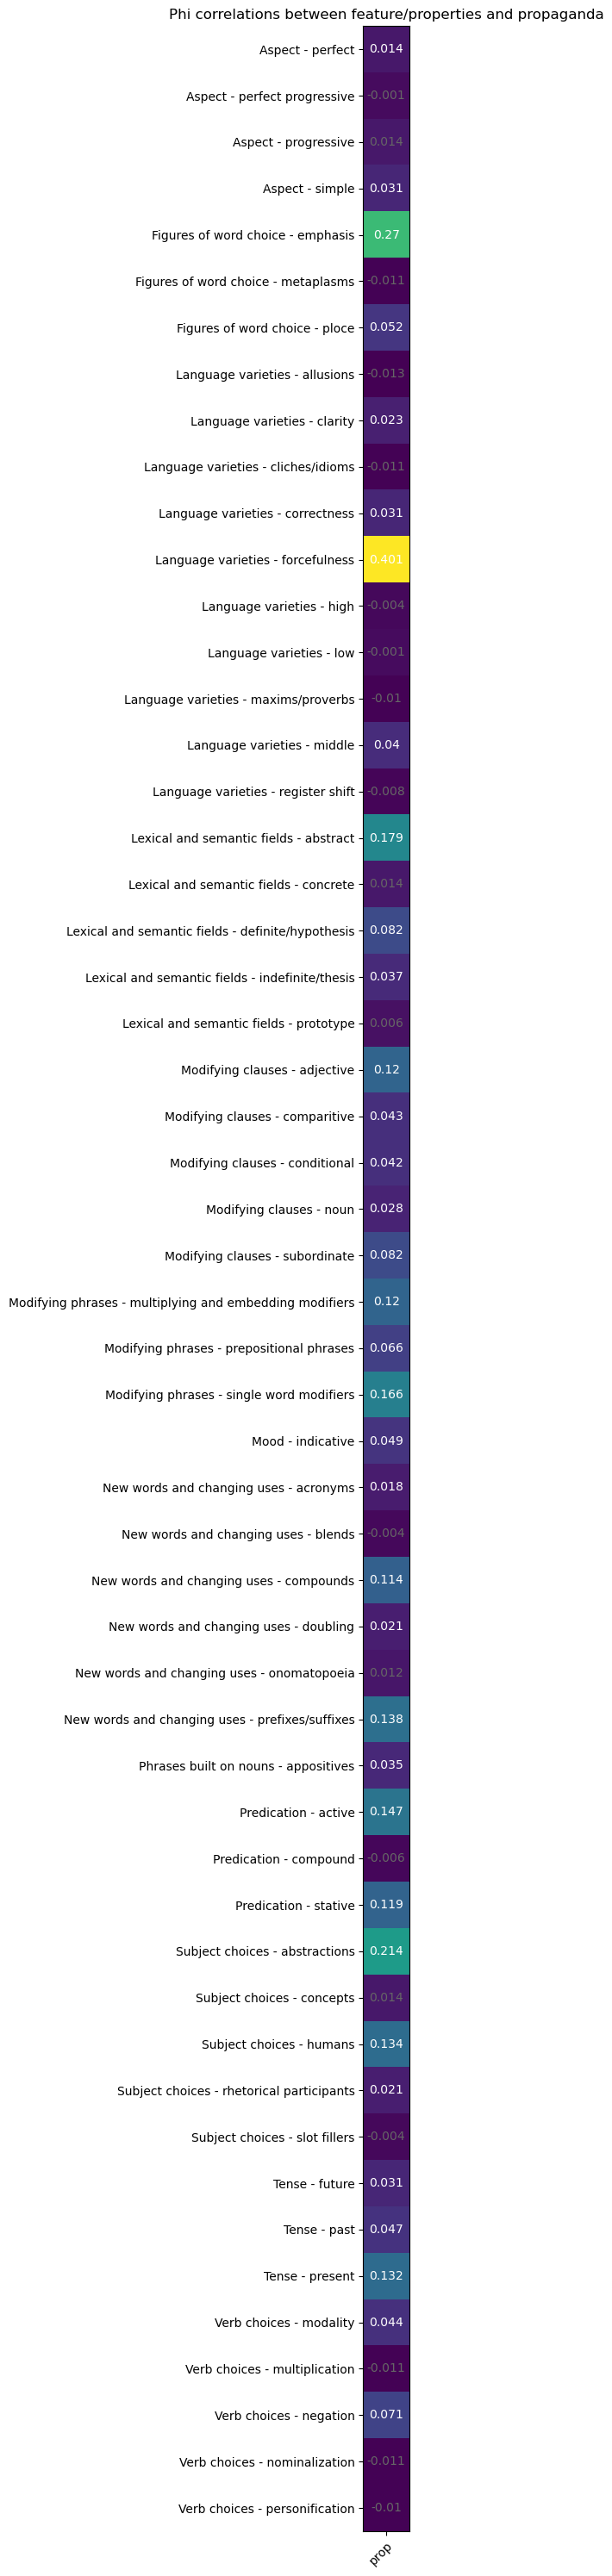

In [390]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl

from collections import OrderedDict
ordered_correlations = OrderedDict(sorted(correlations_binary.items()))

_corrs = []
_props = []

for k,v in ordered_correlations.items():
    # f = feature_prop_dict[k]
    _props.append(k)
    v = [i.round(3) for i in list(np.array(v)[:,0])]
    _corrs.append(v)

_corrs = np.array(_corrs)

fig, ax = plt.subplots(figsize=[20,30])
im = ax.imshow(_corrs)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(1), labels=["prop"])
ax.set_yticks(np.arange(len(_props)), labels=_props)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(_props)):
    for j in range(1):
        if ordered_correlations[_props[i]][j][1] > 0.05:
            text = ax.text(j, i, _corrs[i, j],
                       ha="center", va="center", color="#666666")
        else:
            text = ax.text(j, i, _corrs[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Phi correlations between feature/properties and propaganda")
fig.tight_layout()
fig.savefig("ptc_correlations_binary.eps",format="eps")
plt.show()

In [400]:
def str_to_list(s):
    s = [int(re.sub(r"[\[\]]","",i)) for i in s.split(" ")]
    return s

feature_prop_dict = {'simple': 'Aspect',  'correctness': 'Language varieties',  'clarity': 'Language varieties',  'middle': 'Language varieties',  'abstract': 'Lexical and semantic fields',  'concrete': 'Lexical and semantic fields',  'indefinite/thesis': 'Lexical and semantic fields',  'definite/hypothesis': 'Lexical and semantic fields',  'indicative': 'Mood',  'active': 'Predication',  'humans': 'Subject choices',  'abstractions': 'Subject choices',  'perfect': 'Aspect',  'emphasis': 'Figures of word choice',  'forcefulness': 'Language varieties',  'appositives': 'Phrases built on nouns',  'stative': 'Predication',  'present': 'Tense',  'progressive': 'Aspect',  'adjective': 'Modifying clauses',  'past': 'Tense',  'subordinate': 'Modifying clauses',  'modality': 'Verb choices',  'acronyms': 'New words and changing uses',  'negation': 'Verb choices',  'noun': 'Modifying clauses',  'prefixes/suffixes': 'New words and changing uses',  'compounds': 'New words and changing uses',  'comparitive': 'Modifying clauses',  'future': 'Tense',  'high': 'Language varieties',  'conditional': 'Modifying clauses',  'ploce': 'Figures of word choice',  'perfect progressive': 'Aspect',  'low': 'Language varieties',  'concepts': 'Subject choices',  'allusions': 'Language varieties',  'compound': 'Predication',  'nominalization': 'Verb choices',  'doubling': 'New words and changing uses',  'prototype': 'Lexical and semantic fields',  'onomatopoeia': 'New words and changing uses',  'rhetorical participants': 'Subject choices',  'metaplasms': 'Figures of word choice',  'register shift': 'Language varieties',  'cliches/idioms': 'Language varieties',  'maxims/proverbs': 'Language varieties',  'personification': 'Verb choices',  'multiplication': 'Verb choices',  'blends': 'New words and changing uses',  'slot fillers': 'Subject choices',  'prepositional phrases':'Modifying phrases',  'single word modifiers':'Modifying phrases',  'multiplying and embedding modifiers':'Modifying phrases'}
properties = [ 'simple',  'correctness',  'clarity',  'middle',  'abstract',  'concrete',  'indefinite/thesis',  'definite/hypothesis',  'indicative',  'active',  'humans',  'abstractions',  'perfect',  'emphasis',  'forcefulness',  'appositives',  'stative',  'present',  'progressive',  'adjective',  'past',  'subordinate',  'modality',  'acronyms',  'negation',  'noun',  'prefixes/suffixes',  'compounds',  'comparitive',  'future',  'high',  'conditional',  'ploce',  'perfect progressive',  'low',  'concepts',  'allusions',  'compound',  'nominalization',  'doubling',  'prototype',  'onomatopoeia',  'rhetorical participants',  'metaplasms',  'register shift',  'cliches/idioms',  'maxims/proverbs',  'personification',  'multiplication',  'blends',  'slot fillers',  'single word modifiers',  'prepositional phrases',  'multiplying and embedding modifiers']

correlations     = defaultdict(list)
covariances      = defaultdict(list)
Q_table          = defaultdict(list)
frequencies      = defaultdict(list)
phi_coefficients = defaultdict(list)

# RC_table = [[0]*19]*len(properties)
# count = 0

for prop in tqdm(properties):
    
    """
    query = f'SELECT pa.answer, p.labels, p.technique_classification FROM ebdb.PTC_annotations as pa \
            JOIN ebdb.PTC as p on pa.PTC_id = p.id \
            WHERE pa.property = "{prop}";'
    
    df = pd.read_sql(query, conn)
    df['answer'] = df['answer'].apply(lambda x: 0 if x=='no' else 1)
    df['techniques'] = df['technique_classification'].apply(makeTArr)
    
    df.to_csv("data/correlations/"+prop.replace("/","-")+".csv", index=None)
    """
    
    df = pd.read_csv("data/correlations/"+prop.replace("/","-")+".csv")
    df["techniques"] = df["techniques"].apply(lambda x: str_to_list(x))
    
    
    # y = df['labels']
    # x = df['answer']
    # correlations[prop] = [p_r, p]
    
    
    long_property = feature_prop_dict[prop]+" - "+prop

    x = df['answer']
    
    x_reshaped = np.array(df['answer']).reshape(-1, 1)
    x_scaler = preprocessing.StandardScaler().fit(x_reshaped)
    x_scaled = x_scaler.transform(x_reshaped)
    x_scaled = [a[0] for a in x_scaled]
    
    for i in range(0,19):
        
        y = df['techniques'].apply(lambda z: z[i])
        
        p_r, p = scipy.stats.pearsonr(x, y)
        correlations[long_property].append([p_r,p])
        
        cov = np.cov(x_scaled, y, bias=True)[0][1]
        covariances[long_property].append([cov,0])
        
        """
        make conttingency table
        
                     X
               |  1   0
           --------------
        Y   1  |  a   b
            0  |  c   d
        
        calculate Yules Q
        
        Q = (ad - bc) / (ad + bc)
        
        """
        
        a = sum(x + y == 2)
        b = sum((x == 0) & (y == 1))
        c = sum((x == 1) & (y == 0))
        d = sum(x + y == 0)
        
        Q = (a*d - b*c)/(a*d + b*c)
        
        phi = (a*d - b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
        
        Q_table[long_property].append(Q)
        frequencies[long_property].append(a)
        phi_coefficients[long_property].append(phi)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54/54 [01:04<00:00,  1.19s/it]


In [416]:
corrs_list = [x for xs in list(correlations.values()) for x in xs]


In [417]:
np.array(corrs_list)

array([[ 7.02722637e-03,  3.13685339e-01],
       [ 1.04143403e-02,  1.35394216e-01],
       [ 2.21537903e-03,  7.50770563e-01],
       ...,
       [-1.19541218e-02,  8.65462437e-02],
       [ 1.13804234e-02,  1.02754081e-01],
       [-1.08859475e-01,  3.14211827e-55]])

In [419]:
hist_list = [x[0] for x in np.array(corrs_list) if x[1] <= 0.05]

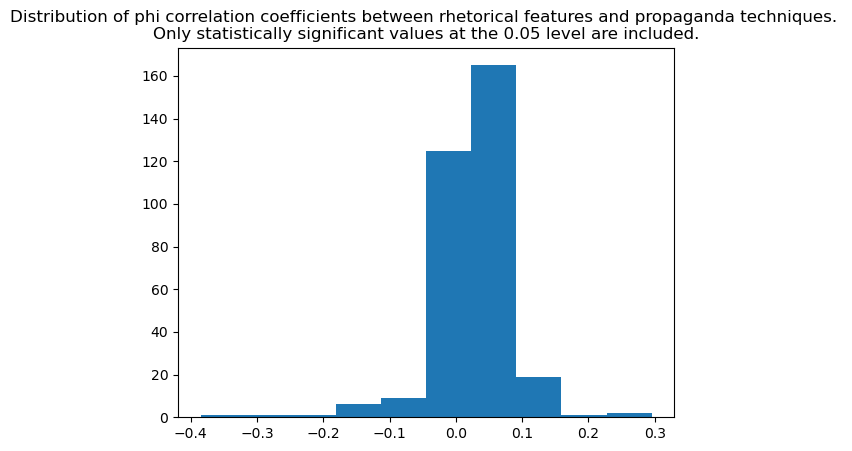

In [422]:
plt.hist(hist_list)
plt.title("Distribution of phi correlation coefficients between rhetorical features and propaganda techniques. \nOnly statistically significant values at the 0.05 level are included.")
plt.savefig("correlation_distribution.eps",format="eps")

# Phi

## Pearson's r Correlation matrix

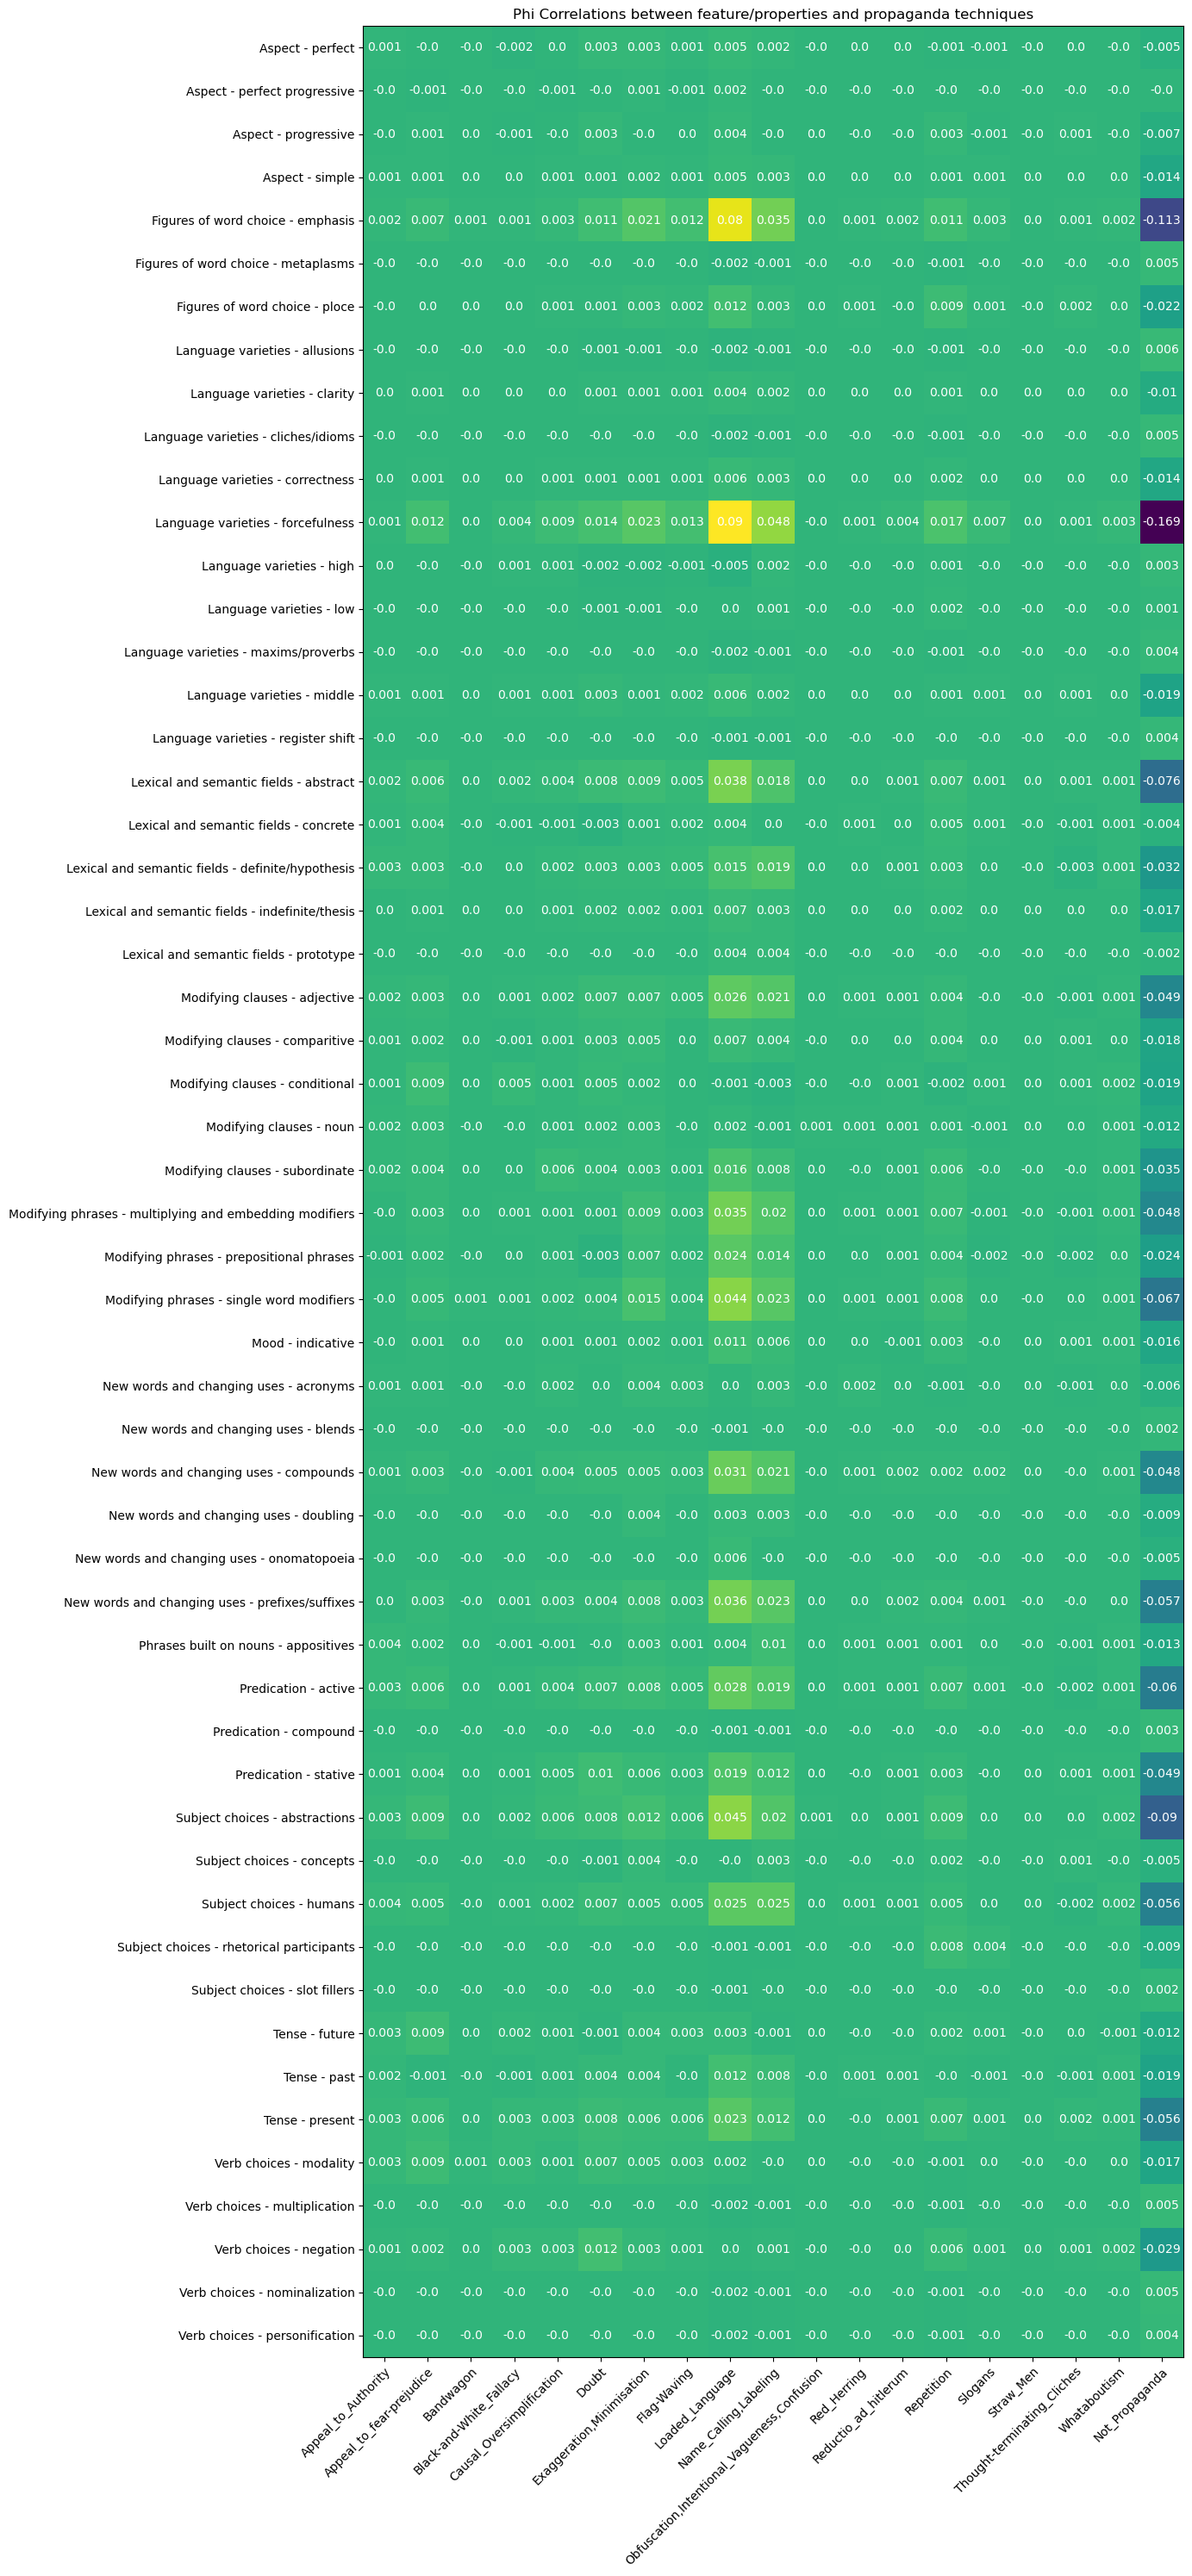

In [394]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl

from collections import OrderedDict
ordered_correlations = OrderedDict(sorted(covariances.items()))

# del ordered_correlations['simple']

_corrs = []
_props = []

for k,v in ordered_correlations.items():
    # f = feature_prop_dict[k]
    _props.append(k)
    v = [i.round(3) for i in list(np.array(v)[:,0])]
    _corrs.append(v)

_corrs = np.array(_corrs)

fig, ax = plt.subplots(figsize=[20,30])
im = ax.imshow(_corrs)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(techniques)), labels=techniques)
ax.set_yticks(np.arange(len(_props)), labels=_props)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(_props)):
    for j in range(len(techniques)):
        if ordered_correlations[_props[i]][j][1] > 0.05:
            text = ax.text(j, i, _corrs[i, j],
                       ha="center", va="center", color="#666666")
        else:
            text = ax.text(j, i, _corrs[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Phi Correlations between feature/properties and propaganda techniques")
fig.tight_layout()
fig.savefig("ptc_covariances_lg.eps",format="eps")
plt.show()

In [138]:
# For each propaganda technique, what are the commonly occuring combinations of features? 
# Perform market basket analysis per technique. Or, train a decision tree?


frequencies = defaultdict(list)

for k,v in Q_table.items():
    for idx, item in enumerate(v):
        frequencies[idx].append((item,k))
    
bar_chart_data = defaultdict(list)   
for k,v in frequencies.items():
    top_10 = sorted(v, reverse=True)[:10]
    bar_chart_data[k] = top_10

In [139]:
bar_chart_data

defaultdict(list,
            {0: [(140, 'Lexical and semantic fields - indefinite/thesis'),
              (140, 'Language varieties - middle'),
              (140, 'Language varieties - correctness'),
              (140, 'Language varieties - clarity'),
              (140, 'Aspect - simple'),
              (139, 'Predication - active'),
              (135, 'Mood - indicative'),
              (133, 'Lexical and semantic fields - abstract'),
              (130, 'Lexical and semantic fields - definite/hypothesis'),
              (129, 'Subject choices - humans')],
             1: [(305, 'Lexical and semantic fields - indefinite/thesis'),
              (305, 'Language varieties - correctness'),
              (305, 'Language varieties - clarity'),
              (305, 'Aspect - simple'),
              (302, 'Mood - indicative'),
              (302, 'Language varieties - middle'),
              (296, 'Lexical and semantic fields - abstract'),
              (294, 'Predication - active'),
    

# Cramer's V

In [ ]:
scipy.stats.contingency.association

"""
Calculates degree of association between two nominal variables.

The function provides the option for computing one of three measures of association between two nominal variables 
from the data given in a 2d contingency table: Tschuprow’s T, Pearson’s Contingency Coefficient and Cramer’s V.

measure the degree to which two nominal or ordinal variables are related, or the level of their association. 
This differs from correlation, although many often mistakenly consider them equivalent. Correlation measures 
in what way two variables are related, whereas, association measures how related the variables are. As such, 
association does not subsume independent variables, and is rather a test of independence. A value of 1.0 indicates 
perfect association, and 0.0 means the variables have no association.

Both the Cramer’s V and Tschuprow’s T are extensions of the phi coefficient. Moreover, due to the close relationship 
between the Cramer’s V and Tschuprow’s T the returned values can often be similar or even equivalent. They are 
likely to diverge more as the array shape diverges from a 2x2


"""

# Feature/property occurance frequencies by split (train, dev, test)

In [40]:
conn = utils.connectDB()

def makeTArr(s):
    tArr = [0]*19
    
    if type(s) == list:
        if len(s) == 0:
            s = [18]
        for i in s:
            tArr[i] = 1
    else:
        try:
            _list = ast.literal_eval(s)
            if len(_list) == 0:
                _list = [18]
            for i in _list:
                tArr[i] = 1
        except:
            pass
    
    return np.array(tArr)

def str_to_list(s):
    s = [int(re.sub(r"[\[\]]","",i)) for i in s.split(" ")]
    return s

def labels_to_list(s):
    if int(s) == 0:
        return [1,0]
    else:
        return [0,1]


frequencies = defaultdict(list)


splits = ["train","validation","test"]

for split in splits:

    for prop in tqdm(properties):

        
        query = f'SELECT p.split, pa.answer, p.labels, p.technique_classification FROM ebdb.PTC_annotations as pa \
                JOIN ebdb.PTC as p on pa.PTC_id = p.id \
                WHERE p.split = "{split}" and pa.property = "{prop}";'

        df = pd.read_sql(query, conn)
        df['answer'] = df['answer'].apply(lambda x: 0 if x=='no' else 1)
        df['techniques'] = df['technique_classification'].apply(makeTArr)

        df.to_csv("data/correlations_splits/"+prop.replace("/","-")+".csv", index=None)
        

        df = pd.read_csv("data/correlations_splits/"+prop.replace("/","-")+".csv")
        df["techniques"] = df["techniques"].apply(lambda x: str_to_list(x))

        df["labels"] = df["labels"].apply(lambda x: labels_to_list(x))

        long_property = feature_prop_dict[prop]+" - "+prop

        x = df['answer']
        frequencies[long_property].append(sum(x))

       

  0%|                                                                                                                                                                                          | 0/54 [00:00<?, ?it/s]/Users/kylehamilton/opt/anaconda3/envs/annotation/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
  2%|███▎                                                                                                                                                                              | 1/54 [00:22<19:30, 22.08s/it]/Users/kylehamilton/opt/anaconda3/envs/annotation/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested

In [45]:
for k,v in OrderedDict(sorted(frequencies.items())).items():
    print(k,"&",v[0],"&",v[1],"&",v[2]," \\\\")

Aspect - perfect & 2397 & 304 & 709  \\
Aspect - perfect progressive & 62 & 10 & 18  \\
Aspect - progressive & 865 & 121 & 329  \\
Aspect - simple & 14096 & 2006 & 3955  \\
Figures of word choice - emphasis & 914 & 158 & 242  \\
Figures of word choice - metaplasms & 4 & 3 & 0  \\
Figures of word choice - ploce & 180 & 37 & 43  \\
Language varieties - allusions & 6 & 5 & 0  \\
Language varieties - clarity & 14159 & 2019 & 3990  \\
Language varieties - cliches/idioms & 4 & 3 & 0  \\
Language varieties - correctness & 14139 & 2016 & 3984  \\
Language varieties - forcefulness & 3526 & 634 & 972  \\
Language varieties - high & 161 & 6 & 0  \\
Language varieties - low & 5 & 4 & 0  \\
Language varieties - maxims/proverbs & 3 & 3 & 0  \\
Language varieties - middle & 13886 & 2001 & 3953  \\
Language varieties - register shift & 3 & 1 & 0  \\
Lexical and semantic fields - abstract & 11802 & 1690 & 3246  \\
Lexical and semantic fields - concrete & 4547 & 760 & 1710  \\
Lexical and semantic field

# Calculate correlations w.r.t. Sentiment features, and POS features.

1. parse_tree_features -> `["S", "SBAR", "SBARQ", "SINV", "SQ", "ADJP", "ADVP", "CONJP", "FRAG", "INTJ", "LST", "NAC", "NP", "NX", "PP", "PRN", "PRT", "QP", "RRC", "UCP", "VP", "WHADJP", "WHAVP", "WHADVP", "WHNP", "WHPP", "X"]`
2. VADER_sentiment -> `['neg','neu','pos','compound']`

In [219]:
pos_features = ["S", "SBAR", "SBARQ", "SINV", "SQ", "ADJP", "ADVP", "CONJP", "FRAG", "INTJ", "LST", "NAC", "NP", "NX", "PP", "PRN", "PRT", "QP", "RRC", "UCP", "VP", "WHADJP", "WHAVP", "WHADVP", "WHNP", "WHPP", "X"]
sent_features = ['negative','neutral','positive','compound']

In [284]:
hyp_df = pd.read_csv("data/correlations_humans/hyperbole.csv")

In [286]:
sum(hyp_df['answer'])

34